<a href="https://colab.research.google.com/github/sishirole-github/LGM_DataScience/blob/main/LGMVIP_Task1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

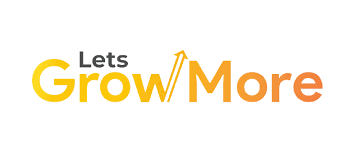

# Task 1 :- Iris Flower Classification ML Project

**Data Set used :- Iris data(http://archive.ics.uci.edu/ml/machine-learning-databases/iris/)**

**Level:Beginner**

Name:-Siddhi Shirole

***Importing the Required Library***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Reading the file
iris_data=pd.read_csv("/content/Iris (1).csv")
df_iris=pd.DataFrame(iris_data)

In [4]:
#It will give the dimension fo the data rows and columns count
df_iris.shape

(150, 6)

In [5]:
#It will give all the column name present in the data
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#It will give stating 5 rows of the data
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#It will give the stastical value of the data it will only work for the nmerical column only
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Count is the count of the total rows resent for the each column

Mean is the mean value for that particular column

Std is the standard deviation of that particular column

Min is the minimum value in that particular column

25% is teh Quartile at 25% for that particular column

50% is teh Quartile at 50% for that particular column

75% is teh Quartile at 75% for that particular column

Max is the maximum value in that particular column



In [8]:
#It will give all the info about the data like data types ,column name ,count,non_null value 
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see that no null value present in the data 

In [9]:
#This function value is for checking the null value in the data as 
#we already saw in the info function that data does not have any null value and this is the another method to check the null value
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Visualization**

**Univariate Analysis**

For Univariate anlysis we can use value_counts function it will also give the same value but visualization is more representable than giving just the value counts.

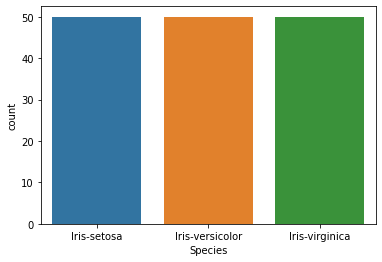

In [10]:
#df_iris["Species"].value_counts()
sns.countplot(x="Species",data=df_iris)

As we can see that every species count is 50.

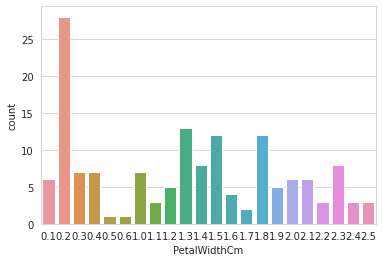

In [15]:
#df_iris["PetalWidthCm"].value_counts()
sns.countplot(x="PetalWidthCm",data=df_iris)

In the above graph most of the petalwidth is 0.2cm and so on for the other values

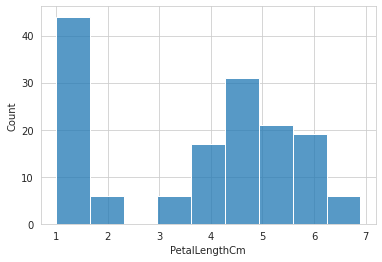

In [16]:
#df_iris["PetalLengthCm"].value_counts()
sns.histplot(data=df_iris,x="PetalLengthCm")

In the above graph 40 is the highest count which for 1 count

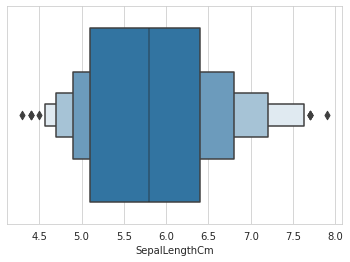

In [17]:
#df_iris["SepalLengthCm"].value_counts()
sns.boxenplot(data=df_iris,x="SepalLengthCm")

As we can see the plot most of the spepal have length between 5 to 6.4.

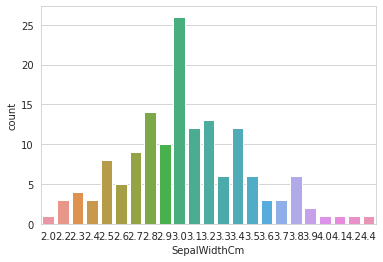

In [14]:
#df_iris["SepalWidthCm"].value_counts()

sns.countplot(x="SepalWidthCm",data=df_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


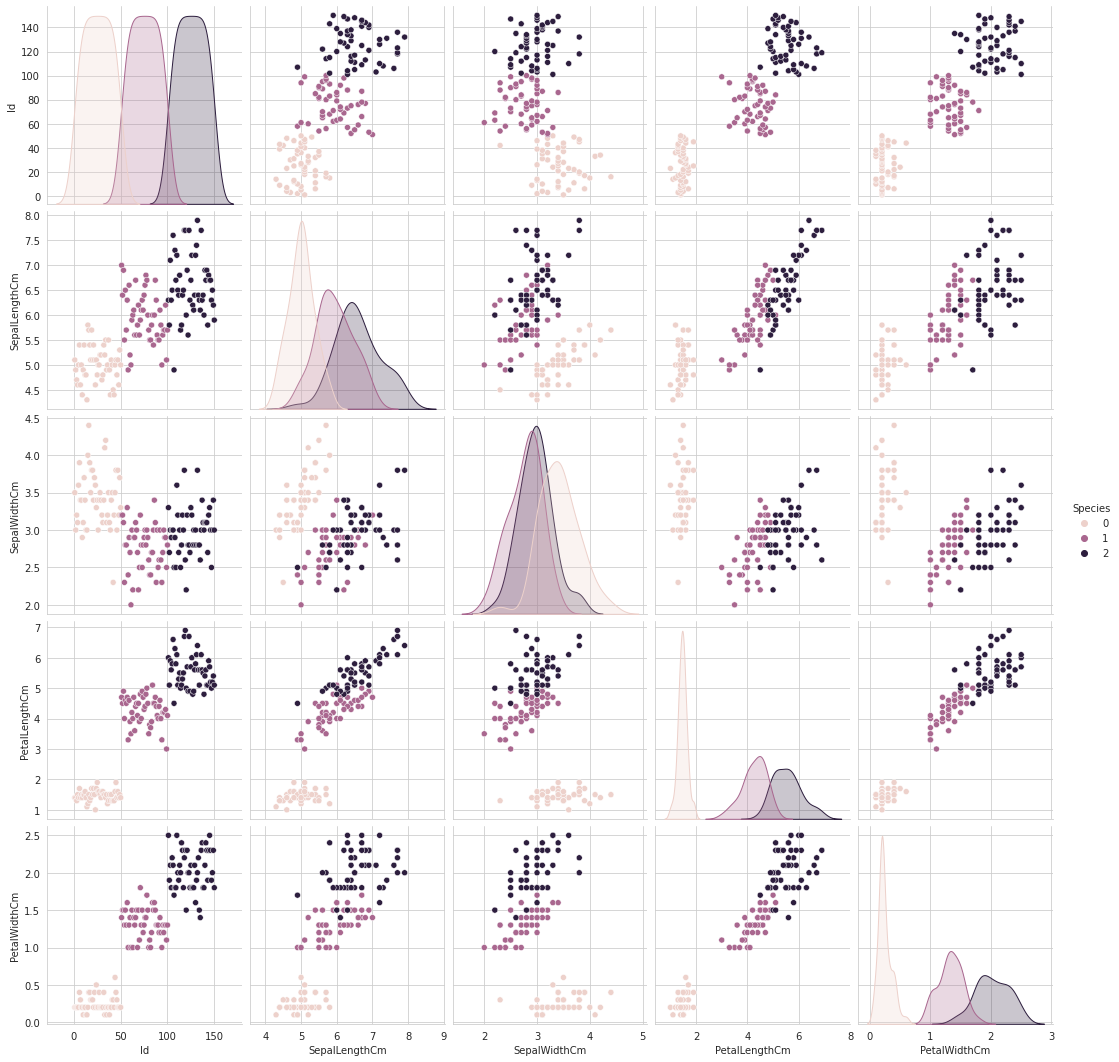

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df_iris,hue="Species",size=3);
plt.show()

**Data Preprocessing**

In [12]:
#It will map the data(In the species column where Iris-setosa will map to 0  
#for Iris-versicolor 1 and for the Iris verginica 2
mapping={'Iris-setosa':0,"Iris-versicolor":1,"Iris-virginica":2}
df_iris["Species"]=df_iris["Species"].map(mapping)

In [11]:
#Lets see our mapping worked or not through value counts function
df_iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

As we can see that in the place of speices name they have mapped value for the paticular species which we have provided

**Dividing the data**

In [18]:
X=iris_data.iloc[:,[1,2,3,4]].values
Y=iris_data.iloc[:,[5]].values

X is our independent column/variable or the input columns which is sepallenght,sepalwidth,petallenght,petalwidth columns.

Y is the dependent column/variable or the target column 

In [19]:
#It will split the data into train and text data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [20]:
X_train.shape

(105, 4)

In [21]:
Y_train.shape

(105, 1)

In [22]:
X_test.shape

(45, 4)

In [23]:
Y_test.shape


(45, 1)

**Creating the Model**

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model=LogisticRegression()
model=model.fit (X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
#It will predict value for the x_text data
y_pred=model.predict(X_test)
#print(y_pred)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



As We can see that the logistic model is giving accuracy of 96%

In [27]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[18  0  0]
 [ 0 12  1]
 [ 0  0 14]]


As in there is total 45 data in the X-text so 14+15+14+2 is 45 and On this model is predicting 2 values wrong.